<div align='center'>
    <h1>Jurnal Praktikum Dasar Kecerdasan Artifisial</h1>
    <h3>Modul 9: Implementasi Greedy BFS</h3>
</div>

### Tujuan Praktikum
- Mahasiswa mampu memahami dan mengimplementasikan algoritma *Greedy Best-First Search* pada Python dengan menggunakan *library* NetworkX.

**Jangan lupa untuk selalu import *library* NetworkX ketika memulai sesi baru (run time) atau kode Python yang memerlukan penggunaan *library* NetworkX.**

### Import *Library* NetworkX dan Matplotlib

*Library* Matplotlib digunakan untuk membantu menampilkan visualisasi graf pada terminal.

In [1]:
import networkx as nx  # Library untuk membuat graf
import matplotlib.pyplot as plt  # Library untuk visualisasi


### Fungsi pendukung untuk mencetak graf 

#### **!! Tidak usah dimodifikasi !!**

In [2]:
# Posisi Nodes
pos = {
    'Pintu Masuk': (0, 0),
    'Wahana A': (1, 2),
    'Wahana B': (1, -2),
    'Wahana C': (3, 0),
    'Wahana D': (4, -2),
    'Wahana Menarik': (5, 0)
}

In [3]:
# Fungsi pendukung untuk mencetak graf
def show_graph(G, pos=None, title='') :
  # Membuat pos jika pos tidak diberikan
  if pos is None:
      pos = nx.spring_layout(G)
  
  # Fungsi untuk menggambar node
  nx.draw(
      G,                  # Graf NetworkX
      pos,                # Posisi node
      with_labels=True,   # Menampilkan nama node 
      node_color='red',   # Warna node
      node_size=4000,     # Ukuran node
      font_color="white", # Warna font label node
      font_size=10,
      width=5             # Ketebalan garis edge
  )

  # Mengambil label edge jika ada weight
  edge_labels = nx.get_edge_attributes(G, 'weight')  
  # Fungsi untuk menggambar node
  nx.draw_networkx_edge_labels(
      G,
      pos,
      edge_labels=edge_labels, # Data weight
      font_color='blue',       # Warna font label edge
      font_weight="bold",      # Berat font label edge
      font_size=16,            # Ukuran font label edge
  )

  plt.margins(0.2)  # Memberikan margin pada plot
  plt.title(title)  # Menampilkan judul graf jika diberikan
  plt.show()  

### 1. Implementasi Greedy BFS pada *Weighted Undirected Graph* (Bobot Nilai: `35`)

Di sebuah taman hiburan terdapat beberapa wahana yang terhubung dengan jalan setapak. Setiap wahana memiliki nama dan jarak tertentu satu sama lain. DI taman hiburan tersebut, seorang pengunjung ingin mencoba wahana yang paling menarik, tetapi ia ingin menggunkaan jalur terpendek untuk smapai ke sana. Pengunjung tersebut memulai perjalanannya dari pintu masuk utama.

Setiap wahana memiliki informasi jarak ke wahana-wahana lainnya yang terhubung langsung. Bantu pengunjung untuk menemukan `wahana menarik` dengan algoritma *Greedy Best-First Search* dengan melakukan langkah-langkah berikut.

**a.** Inisialisasi graf bernama `taman_hiburan` menggunakan **graf tidak berarh**.

In [4]:
# Inisialisasi graf tidak berarah
taman_hiburan = nx.Graph()

**b.** Tambahkan node untuk merepresentasikan setiap wahana di taman hiburan tersebut. Nama wahana adalah sebagai berikut :
- `Pintu Masuk`
- `Wahana A`
- `Wahana B`
- `Wahana C`
- `Wahana D`
- `Wahana Menarik`

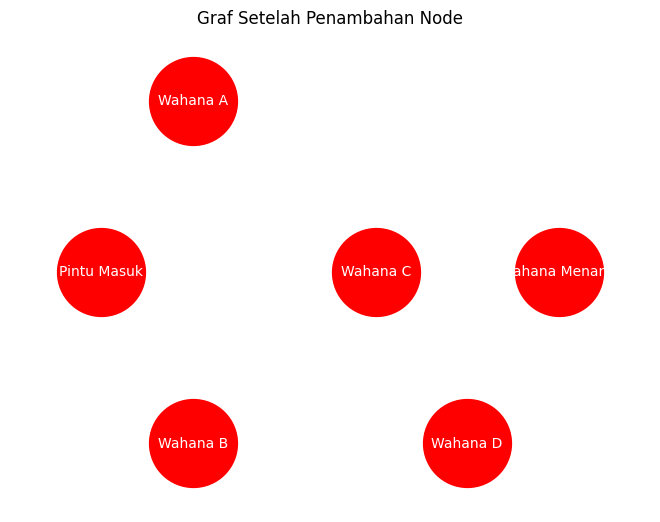

In [5]:
# List daftar nama wahana di dalam taman hiburan
nodes = [
    'Pintu Masuk', 'Wahana A', 'Wahana B', 
    'Wahana C', 'Wahana D', 'Wahana Menarik'
]

# Tambahkan node dari list `nodes` pada graf taman_hiburan
taman_hiburan.add_nodes_from(nodes)

# Tampilkan graf taman_hiburan setelah penambahan node
show_graph(taman_hiburan, pos=pos, title='Graf Setelah Penambahan Node')

Contoh *output*:

![Add Nodes Taman Hiburan](./asset/1_add_nodes_taman_hiburan.png)

**c.** Berikut adalah jarak antar wahana pada taman hiburan

- `Pintu Masuk` ke `Wahana A` -> 400m
- `Pintu Masuk` ke `Wahana B` -> 200m
- `Wahana A` ke `Wahana C` -> 500m
- `Wahana B` ke `Wahana C` -> 100m
- `Wahana C` ke `Wahana Menarik` -> 300m
- `Wahana D` ke `Wahana Menarik` -> 200m

**Pada Greedy BFS, jarak sebenarnya tidak diperhatikan, maka seluruh jarak diubah menjadi 0**

Tambahkan informasi jarak antar wahana sebagai edge pada graf `taman_hiburan`

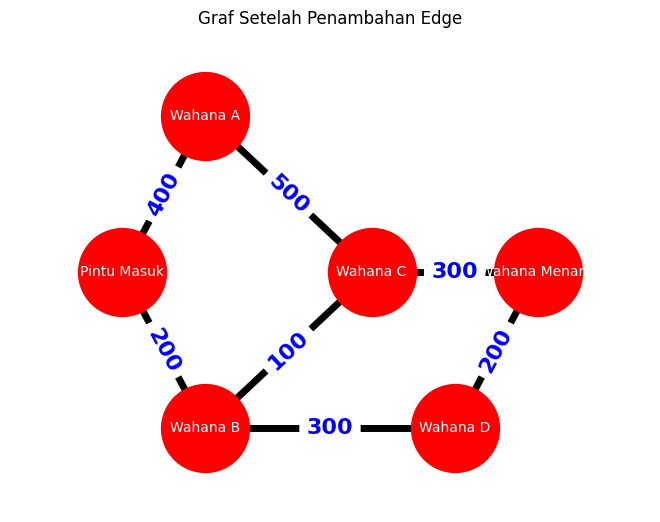

In [6]:
# Daftar jarak antara dua wahana pada taman hiburan
edges = [
    ('Pintu Masuk', 'Wahana A', 400),
    ('Pintu Masuk', 'Wahana B', 200),
    ('Wahana A', 'Wahana C', 500),
    ('Wahana B', 'Wahana C', 100),
    ('Wahana B', 'Wahana D', 300),
    ('Wahana C', 'Wahana Menarik', 300),
    ('Wahana D', 'Wahana Menarik', 200)
]

# Tambahkan jarak yang menghubungkan antara dua wahana dalam graf taman_hiburan
taman_hiburan.add_weighted_edges_from(edges)

# Tampilkan graf taman_hiburan setelah penambahan edge
show_graph(taman_hiburan, pos, "Graf Setelah Penambahan Edge")

Contoh *output*:

![Add edges Taman Hubyran](./asset/2_add_edges_taman_hiburan.png)

**d.** Sekarang, evaluasi elemen pada graf `taman_hiburan` yang sudah dibuat. Tampilkan hal berikut :
- Daftar wahana pada graf yang diwakili oleh node.
- Daftar wahana apa saja yang terhubung yang diwakili oleh edge.
- Jumlah wahana pada graf.

In [7]:
print("Elemen pada Graf:")

# Mencetak daftar node pada graf
print("Wahana yang terdapat pada taman hiburan:", list(taman_hiburan.nodes()))

# Mencetak daftar edge pada graf
print("Daftar wahana yang terhubung:", list(taman_hiburan.edges()))

# Mencetak jumlah node
print("Jumlah wahana pada taman hiburan:", taman_hiburan.number_of_nodes())

Elemen pada Graf:
Wahana yang terdapat pada taman hiburan: ['Pintu Masuk', 'Wahana A', 'Wahana B', 'Wahana C', 'Wahana D', 'Wahana Menarik']
Daftar wahana yang terhubung: [('Pintu Masuk', 'Wahana A'), ('Pintu Masuk', 'Wahana B'), ('Wahana A', 'Wahana C'), ('Wahana B', 'Wahana C'), ('Wahana B', 'Wahana D'), ('Wahana C', 'Wahana Menarik'), ('Wahana D', 'Wahana Menarik')]
Jumlah wahana pada taman hiburan: 6


Contoh *output*:

Elemen pada Graf:
Wahana yang terdapat pada taman hiburan: ['Pintu Masuk', 'Wahana A', 'Wahana B', 'Wahana C', 'Wahana D', 'Wahana Menarik']

Daftar wahana yang terhubung: [('Pintu Masuk', 'Wahana A'), ('Pintu Masuk', 'Wahana B'), ('Wahana A', 'Wahana C'), ('Wahana B', 'Wahana C'), ('Wahana B', 'Wahana D'), ('Wahana C', 'Wahana Menarik'), ('Wahana D', 'Wahana Menarik')]

Jumlah wahana pada taman hiburan: 6

**e.** Membuat fungsi heursitik.

Fungsi heursitik digunakan untuk memperkirakan jarak yang harus ditempuh dari suatu node ke tujuan akhir. Algoritma Greedy BFS akan memilih node berdasarkan nilai heuristik terendah.

Berikut adalah nilai heuristik setiap wahana yang terdapat pada graf `taman_hiburan`:
|Nama Wahana|Nilai Heuristik|
|-----------|---------------|
|Pintu Masuk|600m|
|Wahana A|500m|
|Wahana B|400m|
|Wahana C|300m|
|Wahana D|200m|
|Wahana Menarik|0m|

Buat fungsi untuk menghitung nilai heuristik dengan nama `heuristable()`

In [8]:
def heuristable(a, b):
    if a == 'Pintu Masuk':
        return 600
    elif a == 'Wahana A':
        return 500
    elif a == 'Wahana B':
        return 400
    elif a == 'Wahana C':
        return 300
    elif a == 'Wahana D':
        return 200
    elif a == 'Wahana Menarik':
        return 0
    else:
        return float('inf')  # Jika node tidak dikenali


**f.** Sekarang, tentukan jalur yang dilewati dari `Pintu Masuk` ke `Wahana Menarik` menggunakan algoritma Greedy BFS dan tampilkan urutan wahana yang dikunjungi serta jarak yang ditempuh.

Tip :
Gunakan bantuan function `nx_astar_path()`

In [9]:
# Mencari node yang dikunjungi dari Pintu Masuk ke Wahana Menarik
path_node = nx.astar_path(taman_hiburan, 'Pintu Masuk', 'Wahana Menarik', heuristic=heuristable, weight='weight')

# Menghitung jarak yang ditempuh dari Pintu Masuk ke Wahana Menarik
path_length = nx.astar_path_length(taman_hiburan,'Pintu Masuk', 'Wahana Menarik', heuristic=heuristable, weight='weight')

# Cetak hasil
print("Wahana yang dikunjungi dari Pintu Masuk ke Wahana Menarik adalah:", path_node)
print("Jarak yang ditempuh dari Pintu Masuk ke Wahana Menarik sejauh:", path_length, "meter")

Wahana yang dikunjungi dari Pintu Masuk ke Wahana Menarik adalah: ['Pintu Masuk', 'Wahana B', 'Wahana C', 'Wahana Menarik']
Jarak yang ditempuh dari Pintu Masuk ke Wahana Menarik sejauh: 600 meter


Contoh *output*:

Wahana yang dikunjungi dari Pintu Masuk ke Wahana Menarik adalah: ['Pintu Masuk', 'Wahana B', 'Wahana C', 'Wahana Menarik']

Jarak yang ditempuh dari Pintu Masuk ke Wahana Menarik sejauh: 600 meter

### 2. Implementasi Greedy BFS pada Weighted Directed Graph (Bobot Nilai: `65`)

Di sebuah galeri seni modern terdapat beberapa pameran seni yang terhubung dengan jalur-jalur dalam ruangan. Setiap instalasi memiliki nama dan jarak tertentu satu sama lain. Pada galeri tersebut, Tanto ingin melihat pameran seni Leonardo da Vinci, tetapi ia ingin menggunakan jalur terpendek untuk sampai ke sana. Pengunjung tersebut memulai perjalanannya dari pintu masuk utama.

Bantu Valen untuk menemukan `Pameran Leonardo da Vinci` dengan algoritma Greedy BFS edngan melakukan langkah-langkah berikut.

In [10]:
import networkx as nx # Library untuk membuat graf
import matplotlib.pyplot as plt # Library untuk visualisasi

### Fungsi pendukung untuk mencetak graf 

#### **!! Tidak usah dimodifikasi !!**

In [11]:
# Posisi node
pos = {
    'Pintu Masuk': (0, 0),
    'Van Gogh': (1, 3),
    'Picasso': (1, -3),
    'Monet': (4, 1),
    'Dali': (3, -3),
    'Klimt': (6, -1),
    'da Vinci': (7, 1)
}

In [12]:
# Fungsi pendukung untuk mencetak graf
def show_graph(G, pos=None, title='') :
  # Membuat pos jika pos tidak diberikan
  if pos is None:
      pos = nx.spring_layout(G)
  
  # Fungsi untuk menggambar node
  nx.draw(
      G,                  # Graf NetworkX
      pos,                # Posisi node
      with_labels=True,   # Menampilkan nama node 
      node_color='red',   # Warna node
      node_size=2000,     # Ukuran node
      font_color="white", # Warna font label node
      font_size=10,
      width=5             # Ketebalan garis edge
  )

  # Mengambil label edge jika ada weight
  edge_labels = nx.get_edge_attributes(G, 'weight')  
  # Fungsi untuk menggambar node
  nx.draw_networkx_edge_labels(
      G,
      pos,
      edge_labels=edge_labels, # Data weight
      font_color='blue',       # Warna font label edge
      font_size=10,            # Ukuran font label edge
  )

  plt.margins(0.2)  # Memberikan margin pada plot
  plt.title(title)  # Menampilkan judul graf jika diberikan
  plt.show()  

**a.** Inisialisasi graf berarah bernama `galeri_seni` untuk menampung informasi pameran beserta jarak antara pameran tersebut.

In [13]:
# Inisialisasi graf berarah
galeri_seni = nx.DiGraph()

**b.** Pada galeri seni, seluruh pengunjung mulai dari pintu masuk yang kemudian terdapat beberapa pameran dari berbagai seniman dengan daftar sebagai berikut:

- Van Gogh
- Picasso
- Monet
- Dali
- Klimt
- da Vinci

Tambahkan pintu masuk dan seluruh tempat pameran tersebut ke dalam graf yang sudah dibuat, kemudian tampilkan hasil graf yang sudah terdapat seluruh tempat pada galeri seni.

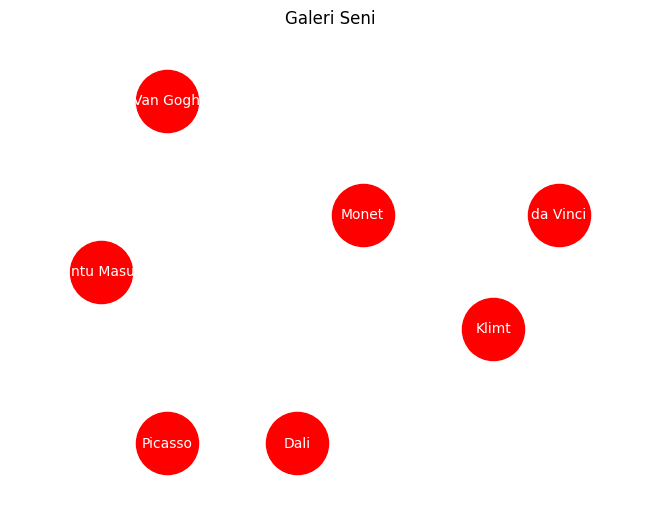

In [14]:
# List nama tempat pada galeri seni
nodes = [
    'Pintu Masuk', 'Van Gogh', 'Picasso', 'Monet', 'Dali', 'Klimt', 'da Vinci'
]

# Tambahkan node dari daftar pameran yang terdapat pada galeri seni
galeri_seni.add_nodes_from(nodes)

# Tampilkan graf galeri_seni setelah penambahan node
show_graph(galeri_seni, pos=pos, title="Galeri Seni")

Contoh *output*:

![Add Nodes Galeri Seni](./asset/3_add_nodes_galeri_seni.png)

**c.** Berikut adalah jarak dari setiap lokasi pameran pada galeri seni
- **Pintu Masuk** ke **Pameran Van Gogh** memiliki jarak sejauh 350m.
- **Pintu Masuk** ke **Pameran Picasso** memiliki jarak sejauh 400m.
- **Pameran Van Gogh** ke **Pameran Monet** memiliki jarak sejauh 250m.
- **Pameran Picasso** ke **Pameran Dali** memiliki jarak sejauh 300m.
- **Pameran Monet** ke **Pameran Leonardo da Vinci** memiliki jarak sejauh 150m.
- **Pameran Klimt** ke **Pameran Leonardo da Vinci** memiliki jarak sejauh 50m.

**Pada Greedy BFS, jarak sebenarnya tidak diperhatikan, maka seluruh jarak diubah menjadi 0**

Tambahkan data jarak tersebut ke dalam graf `galeri_seni`, kemudian tampilkan graf setelah ditambahkan jarak.

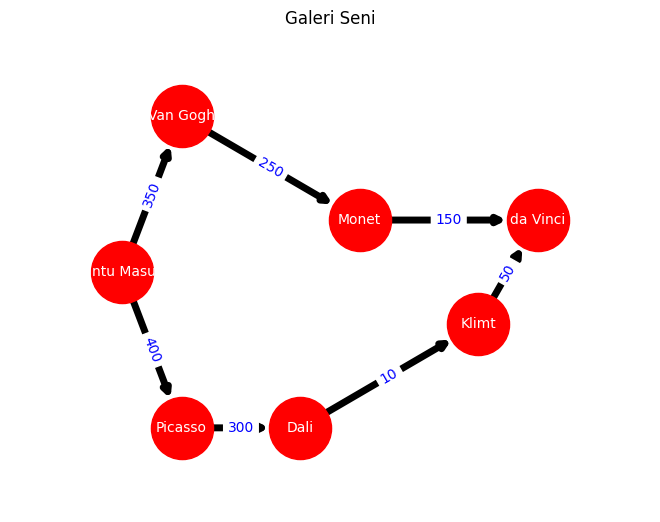

In [15]:
# Daftar jarak antara dua tempat pada galeri seni
edges = [
    ('Pintu Masuk', 'Van Gogh', 350),
    ('Pintu Masuk', 'Picasso', 400),
    ('Van Gogh', 'Monet', 250),
    ('Picasso', 'Dali', 300),
    ('Monet', 'da Vinci', 150),
    ('Dali', 'Klimt', 10),
    ('Klimt', 'da Vinci', 50)
]

# Tambahkan jarak yang menghubungkan antara dua pameran
galeri_seni.add_weighted_edges_from(edges)

# Tampilkan graf galeri_seni setelah penambahan edges
show_graph(galeri_seni, pos=pos, title="Galeri Seni")

Contoh *output* :

![Add Edges Galeri Seni](./asset/4_add_edges_galeri_seni.png)

**d.** Buat fungsi heuristik bernama `heuristable()` untuk menghitung nilai heuristik dari setiap lokasi pameran dengan nilai heuristik berikut:

|Nama Tempat|Nilai Heuristik|
|-----------|---------------|
|Pintu Masuk|600m|
|Van Gogh   |450m|
|Picasso    |500m|
|Monet      |200m|
|Dali       |300m|
|Klimt      |100m|
|da Vinci   |0m|

In [16]:
# Fungsi untuk menghitung nilai heuristik setiap node
def heuristable(a, b):
    if a == 'Pintu Masuk':
        return 0
    elif a == 'Van Gogh':
        return 100
    elif a == 'Picasso':
        return 200
    elif a == 'Monet':
        return 300
    elif a == 'Dali':
        return 400
    elif a == 'Klimt':
        return 500
    elif a == 'da Vinci':
        return 600
    else:
        return float('inf')  # Jika node tidak dikenali

**e.** Sekarang tentukan jalur yang dilewati dari `Pintu Masuk` ke `Pameran Leonardo da Vinci` menggunakan algoritma Greedy BFS yang memanfaatkan fungsi `nx.astar_path()`. Kemudian tampilkan urutan tempat yang dikunjungi serta jarak yang ditempuh.

In [17]:
# Mencari node yang dikunjungi dari Pintu Masuk ke da Vinci
path_node = nx.astar_path(galeri_seni, 'Pintu Masuk', 'da Vinci', heuristic=heuristable, weight='weight')
# Menghitung jarak yang ditempuh dari Pintu Masuk ke da Vinci
path_length = nx.astar_path_length(galeri_seni,'Pintu Masuk', 'da Vinci', heuristic=heuristable, weight='weight')
# Cetak hasil
print("Instalasi yang dikunjungi dari Pintu Masuk ke INstalasi Terkenal adalah :", path_node)
print("Jarak yang ditempuh dari Pintu Masuk ke da Vinci sejauh:", path_length, "meter")

Instalasi yang dikunjungi dari Pintu Masuk ke INstalasi Terkenal adalah : ['Pintu Masuk', 'Van Gogh', 'Monet', 'da Vinci']
Jarak yang ditempuh dari Pintu Masuk ke da Vinci sejauh: 750 meter


Contoh *output*:

Instalasi yang dikunjungi dari Pintu Masuk ke Instalasi Terkenal adalah: ['Pintu Masuk', 'Van Gogh', 'Monet', 'da Vinci']

Jarak yang ditempuh dari Pintu Masuk ke Instalasi Terkenal sejauh: 750 m